# **PRCP-1002-Handwritten Digits Recognition**

## **Problem Statement**

### **Task 1:-Prepare a complete data analysis report on the given data.**

### **Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.**

### **Task3:-Compare between various models and find the classifier that works better.**

### **Task 1: Prepare a Complete Data Analysis Report**

### Step 1: Load the Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shapes of the datasets
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


### **Explanation:**

Import necessary libraries for data handling, model building, and evaluation.
mnist.load_data() loads the MNIST dataset, containing 60,000 training images and 10,000 test images of handwritten digits. Printing statements confirm the shapes of the datasets to understand the data structure.

### **Step 2: Visualize the Data**

In [3]:
# Function to plot sample images
def plot_sample_images(images, labels, n=25):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()


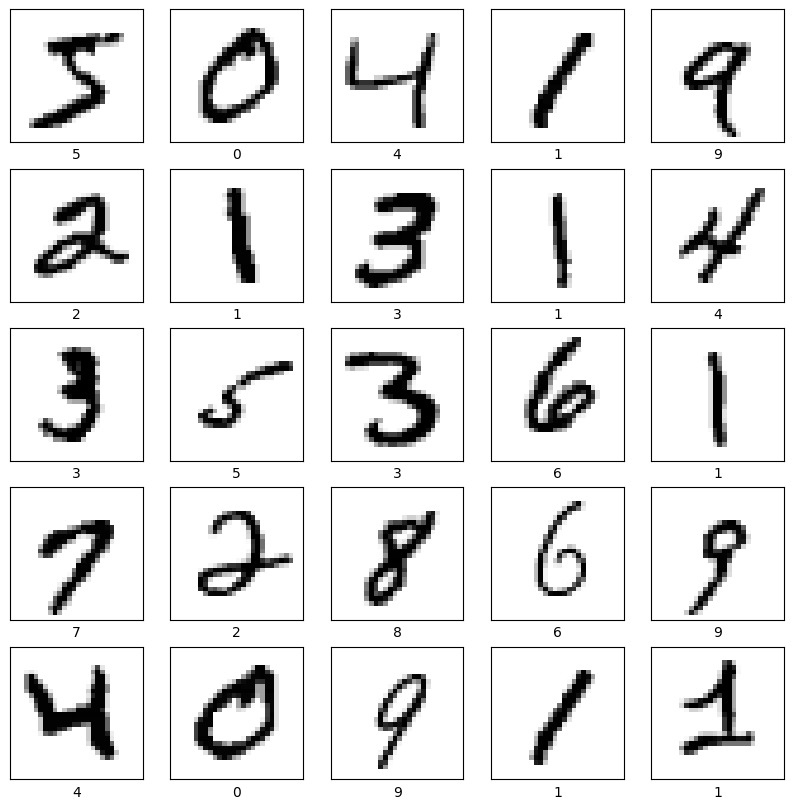

In [4]:
# Plot sample images
plot_sample_images(x_train, y_train)

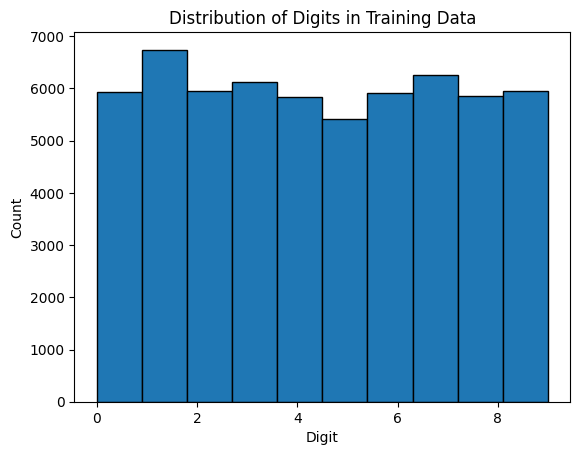

In [5]:
# Plot distribution of digits
plt.hist(y_train, bins=10, edgecolor='black')
plt.title('Distribution of Digits in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

### **Explanation:**

Defined a function plot_sample_images to display sample images from the dataset and visualize the distribution of digits using a histogram..

### **Step 3: Preprocess the Data**

In [6]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")


Training set shape: (54000, 28, 28)
Validation set shape: (6000, 28, 28)
Test set shape: (10000, 28, 28)


### **Explanation:**

Normalizing the pixel values of images to a range of [0, 1], and spliting the training data into training and validation sets for model training.

### **Step 4: Exploratory Data Analysis (EDA) with PCA**

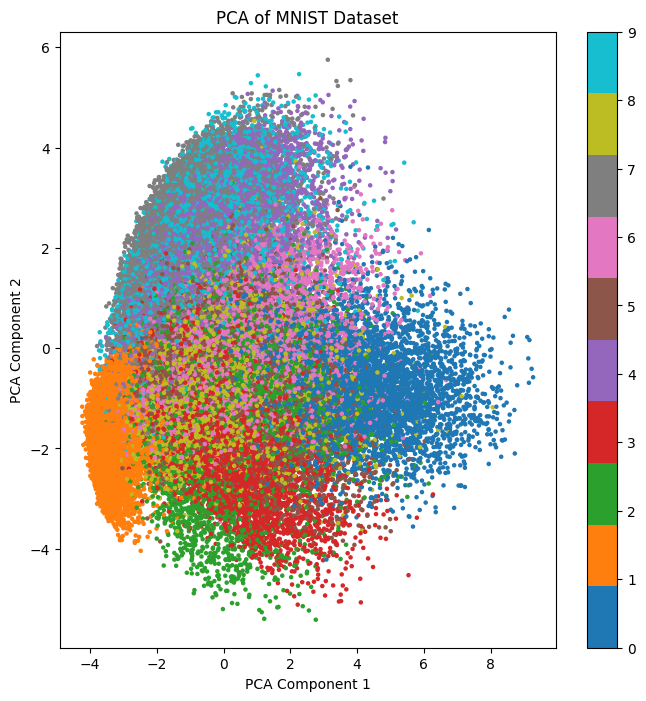

In [7]:
# Flatten the images for PCA
flat_train_images = x_train.reshape(x_train.shape[0], -1)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flat_train_images)

plt.figure(figsize=(8, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap='tab10', s=5)
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA of MNIST Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()








### **Explanation:**

Flattening the images and perform Principal Component Analysis (PCA) to visualize the dataset in 2D space, coloring points by their labels.

### **Task 2: Classify Handwritten Digits**

### **Step 1: Preprocess Data for CNN**

In [8]:
# Reshape data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [9]:
# Convert labels to categorical format
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_val_cat = tf.keras.utils.to_categorical(y_val, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train_cat shape: {y_train_cat.shape}")

x_train shape: (54000, 28, 28, 1)
x_val shape: (6000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train_cat shape: (54000, 10)


### **Explanation:**
Reshaping data for CNN input and convert labels to categorical format using one-hot encoding.

### **Step 2: Build the CNN Model**


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### **Explanation:**

Building a Sequential CNN model using TensorFlow/Keras, defining convolutional, max-pooling, flatten, dense, and dropout layers.

### **Step 3: Compile the Model**

In [12]:
# Compile the model with early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### **Explanation:**

Compilation of the CNN model with an optimizer, loss function, and metrics for evaluation.


### **Step 4: Train the Model**

In [13]:
# Train the model with early stopping
history = model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_val, y_val_cat), callbacks=[early_stopping])


Epoch 1/20
1688/1688 [==============================] - 67s 38ms/step - loss: 0.2197 - accuracy: 0.9326 - val_loss: 0.0490 - val_accuracy: 0.9857
Epoch 2/20
1688/1688 [==============================] - 55s 33ms/step - loss: 0.0807 - accuracy: 0.9763 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 3/20
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 4/20
1688/1688 [==============================] - 48s 28ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0336 - val_accuracy: 0.9890
Epoch 5/20
1688/1688 [==============================] - 63s 38ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0301 - val_accuracy: 0.9918
Epoch 6/20
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0342 - accuracy: 0.9888 - val_loss: 0.0329 - val_accuracy: 0.9912
Epoch 7/20
1688/1688 [==============================] - 60s 35ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0373 -

### **Explanation:**

Training the CNN model on the training data, using early stopping to prevent overfitting.



### **Step 5: Evaluate the Model**

In [14]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 2s 7ms/step - loss: 0.0319 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


### **Explanation:**

Evaluation of the trained CNN model on the test data and print the test accuracy.

### **Step 6: Predict New Images**

In [15]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)



313/313 [==============================] - 2s 7ms/step


In [16]:
# Function to plot sample images with predicted labels
def plot_predictions(images, true_labels, predicted_labels, n=25):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        color = 'blue' if predicted_labels[i] == true_labels[i] else 'red'
        plt.xlabel(f"Pred: {predicted_labels[i]} (True: {true_labels[i]})", color=color, fontsize=12)
    plt.tight_layout()
    plt.show()



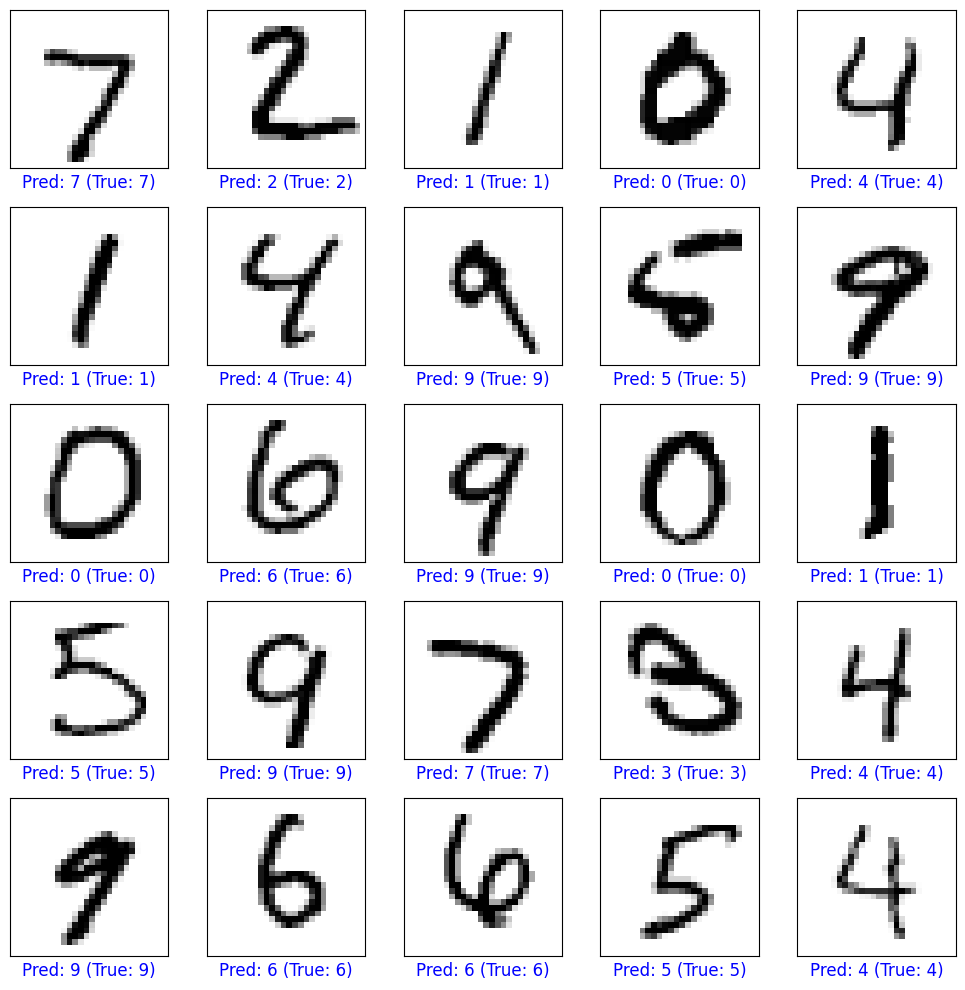

In [17]:
# Plot sample predictions
plot_predictions(x_test, y_test, predicted_classes)

### **Explanation:**

Making predictions on the test set and plot sample images with predicted labels to visualize model performance

### **Task 3: Compare Various Models**

### **Preprocess Data for Non-CNN Models**

In [18]:
# Flatten the images for non-CNN models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Split the training data into training and validation sets
x_train_flat, x_val_flat, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.1, random_state=42)

print(f"x_train_flat shape: {x_train_flat.shape}")
print(f"x_val_flat shape: {x_val_flat.shape}")
print(f"x_test_flat shape: {x_test_flat.shape}")



x_train_flat shape: (48600, 784)
x_val_flat shape: (5400, 784)
x_test_flat shape: (10000, 784)


### **Explanation:**

Flattening the images for non-CNN models and split the data into training and validation sets.

### **Explanation:**

Training several non-CNN models (Logistic Regression, SVM, KNN, Random Forest) using the training data and evaluate their performance using validation accuracy.

In [19]:
from sklearn.model_selection import GridSearchCV

# Initialize models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100)

# Train Logistic Regression
logreg.fit(x_train_flat, y_train)
logreg_acc = logreg.score(x_val_flat, y_val)
print(f"Logistic Regression validation accuracy: {logreg_acc}")

# Train SVM
svm.fit(x_train_flat, y_train)
svm_acc = svm.score(x_val_flat, y_val)
print(f"SVM validation accuracy: {svm_acc}")

# Train KNN
knn.fit(x_train_flat, y_train)
knn_acc = knn.score(x_val_flat, y_val)
print(f"KNN validation accuracy: {knn_acc}")

# Train Random Forest
rf.fit(x_train_flat, y_train)
rf_acc = rf.score(x_val_flat, y_val)
print(f"Random Forest validation accuracy: {rf_acc}")

# Evaluate CNN model
cnn_loss, cnn_acc = model.evaluate(x_test, y_test_cat)
print(f"CNN test accuracy: {cnn_acc}")

# Model comparison
model_accuracies = {
    'Logistic Regression': logreg_acc,
    'SVM': svm_acc,
    'KNN': knn_acc,
    'Random Forest': rf_acc,
    'CNN': cnn_acc
}

# Print all model accuracies
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} validation accuracy: {accuracy}")

# Display the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model} with accuracy of {model_accuracies[best_model]}")


Logistic Regression validation accuracy: 0.9205555555555556
SVM validation accuracy: 0.9779629629629629
KNN validation accuracy: 0.9707407407407408
Random Forest validation accuracy: 0.9668518518518519
313/313 [==============================] - 5s 15ms/step - loss: 0.0319 - accuracy: 0.9900
CNN test accuracy: 0.9900000095367432
Logistic Regression validation accuracy: 0.9205555555555556
SVM validation accuracy: 0.9779629629629629
KNN validation accuracy: 0.9707407407407408
Random Forest validation accuracy: 0.9668518518518519
CNN validation accuracy: 0.9900000095367432
The best model is: CNN with accuracy of 0.9900000095367432


### **Explanation:**

Comparing the validation accuracies of all models, including the CNN model, and identify the best-performing model.

### **Model Evaluation Metrics**

In [20]:
# Evaluate Logistic Regression
logreg_acc = logreg.score(x_val_flat, y_val)
logreg_pred = logreg.predict(x_val_flat)
print(f"Logistic Regression validation accuracy: {logreg_acc}")
print(classification_report(y_val, logreg_pred))

# Evaluate SVM
svm_acc = svm.score(x_val_flat, y_val)
svm_pred = svm.predict(x_val_flat)
print(f"SVM validation accuracy: {svm_acc}")
print(classification_report(y_val, svm_pred))

# Evaluate KNN
knn_acc = knn.score(x_val_flat, y_val)
knn_pred = knn.predict(x_val_flat)
print(f"KNN validation accuracy: {knn_acc}")
print(classification_report(y_val, knn_pred))

# Evaluate Random Forest
rf_acc = rf.score(x_val_flat, y_val)
rf_pred = rf.predict(x_val_flat)
print(f"Random Forest validation accuracy: {rf_acc}")
print(classification_report(y_val, rf_pred))


Logistic Regression validation accuracy: 0.9205555555555556
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       485
           1       0.95      0.96      0.95       601
           2       0.92      0.89      0.91       572
           3       0.92      0.90      0.91       556
           4       0.91      0.95      0.93       518
           5       0.90      0.88      0.89       492
           6       0.94      0.96      0.95       497
           7       0.93      0.95      0.94       603
           8       0.90      0.86      0.88       557
           9       0.90      0.89      0.90       519

    accuracy                           0.92      5400
   macro avg       0.92      0.92      0.92      5400
weighted avg       0.92      0.92      0.92      5400

SVM validation accuracy: 0.9779629629629629
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       485
           1       0.98     

### **Explanation:**

Evaluating  each model using classification metrics (precision, recall, F1-score) and print classification reports for deeper analysis.

### **Error Analysis**

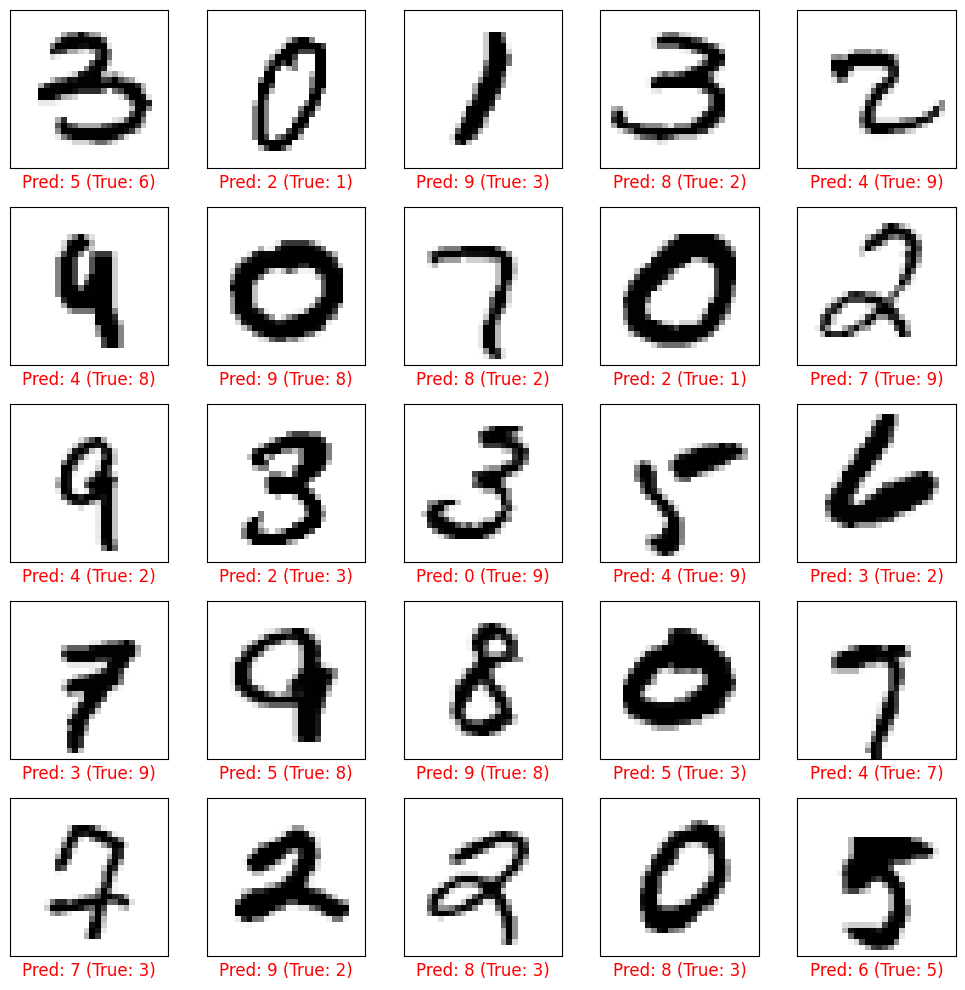

In [21]:
# Plot misclassified images for SVM
svm_pred = svm.predict(x_val_flat)
misclassified_idx = np.where(svm_pred != y_val)[0]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_val[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {svm_pred[idx]} (True: {y_val[idx]})", color='red', fontsize=12)
plt.tight_layout()
plt.show()


### **Explanation:**

Visualizing misclassified images to understand where models might be struggling.